Van Der Pol: Numerical versus Asymptotic Expansion

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [205]:
t0 = 0
tN = 200
epsilon = 0.1
t = np.linspace(t0, tN, 1000)  
tf = t
ts = epsilon * t

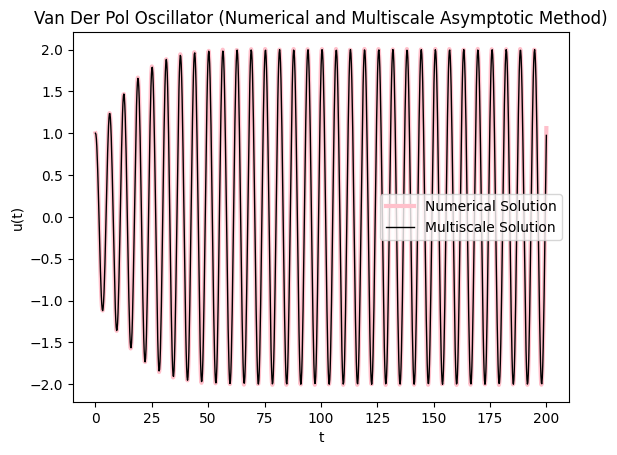

In [206]:

def system(t, u):
    u1, u2 = u
    du1_dt = u2
    du2_dt = epsilon*(1-u1**2)*u2 - u1
    return [du1_dt, du2_dt]

# Initial conditions
u1_0 = 1  # u(0) = 1
u2_0 = 0  # du/dt(0) = 0
y0 = [u1_0, u2_0]
# solve
sol = solve_ivp(system, (t0, tN), y0, t_eval=t, method='RK45')
ts_numerical = sol.t
us_numerical = sol.y[0]

#----- Multiscale Solution

def multiscale_soln(t):
  u = (2/(np.sqrt((3*np.exp(-ts)) + 1)))*np.cos(tf)
  return u 
multiscale_solution = multiscale_soln(ts)

#------ Plot
plt.plot(ts_numerical, us_numerical, color = "pink", linewidth = 3, label = "Numerical Solution")
plt.plot(t, multiscale_solution, label='Multiscale Solution', linewidth=1, color = "black")
plt.xlabel("t")
plt.ylabel(rf"u(t)")
plt.title("Van Der Pol Oscillator (Numerical and Multiscale Asymptotic Method)")
plt.legend(loc = "best")

Question 1 page 131 Bush Textbook

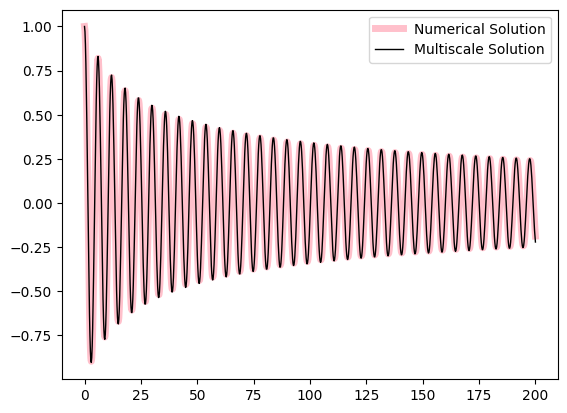

In [207]:
#----- Numerical Solution

def system2(t, y):
  u1, u2 = y
  du1_dt = u2
  du2_dt = -u1 - epsilon*((u2)**3 + u1)
  return [du1_dt, du2_dt]

# Initial conditions
u1_0 = 1  # u(0) = 1
u2_0 = 0  # du/dt(0) = 0
y0 = [u1_0, u2_0]
sol2 = solve_ivp(system2, (t0, tN), y0, t_eval=t, method='RK45')
ts_numerical2 = sol2.t
us_numerical2 = sol2.y[0]

#----- Multiscale Solution

def multiscale_soln2(t):
  f = (2/(np.sqrt(4 + (3*ts)))) * np.cos((ts/2) + tf)
  return f

#------ Plot
plt.clf()
multiscale_solution2 = multiscale_soln2(t)
plt.plot(ts_numerical2, us_numerical2, color = "pink", linewidth = 5, label = "Numerical Solution")
plt.plot(t, multiscale_solution2, label='Multiscale Solution', linewidth=1, color = "black")
plt.legend()
